<a href="https://colab.research.google.com/github/Narennnnn/DataSciFolio/blob/main/AgeIncomeAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


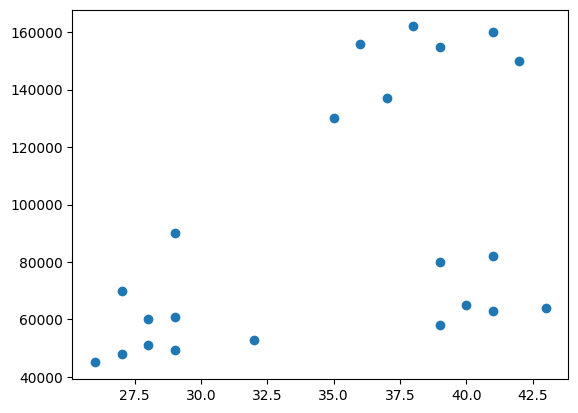

In [8]:
plt.scatter(df['Age'],df['Income($)'])

In [11]:
km=KMeans(n_clusters=3)

In [15]:
y_predict=km.fit_predict(df[['Age','Income($)']])
y_predict

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [17]:
df['clusters']=y_predict
df.head()

,Name,Age,Income($),cluster,clusters
0,Rob,27,70000,0,0
1,Michael,29,90000,0,0
2,Mohan,29,61000,2,2
3,Ismail,28,60000,2,2
4,Kory,42,150000,1,1


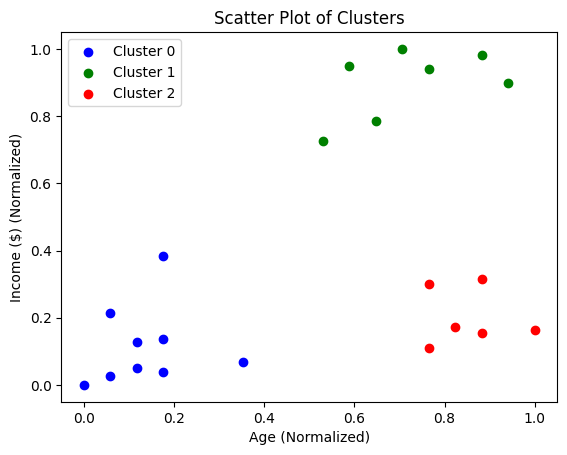

In [35]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[['Age', 'Income($)']] = scaler.fit_transform(df[['Age', 'Income($)']])
colors = ['blue', 'green', 'red']

df1 = df[df.clusters == 0]
df2 = df[df.clusters == 1]
df3 = df[df.clusters == 2]

plt.scatter(df1['Age'], df1['Income($)'], color=colors[0], label='Cluster 0')
plt.scatter(df2['Age'], df2['Income($)'], color=colors[1], label='Cluster 1')
plt.scatter(df3['Age'], df3['Income($)'], color=colors[2], label='Cluster 2')

plt.xlabel('Age (Normalized)')
plt.ylabel('Income ($) (Normalized)')
plt.legend()
plt.title('Scatter Plot of Clusters')
plt.show()


In [27]:
km=KMeans(n_clusters=3)
y_predict=km.fit_predict(df[['Age','Income($)']])
y_predict

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [30]:
df['clusters']=y_predict
df.drop('cluster',axis='columns',inplace=True)
df

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [36]:
km.cluster_centers_ #centroids

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

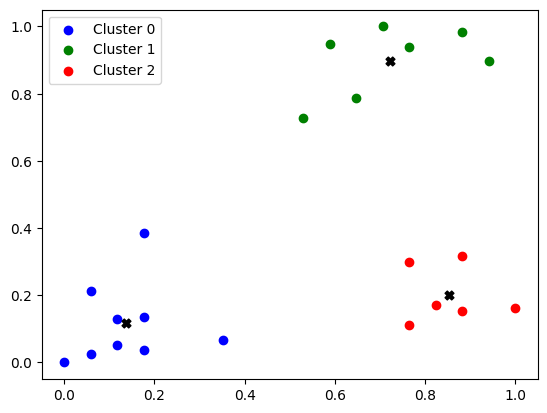

In [39]:
colors = ['blue', 'green', 'red']

df1 = df[df.clusters == 0]
df2 = df[df.clusters == 1]
df3 = df[df.clusters == 2]

plt.scatter(df1['Age'], df1['Income($)'], color='blue', label='Cluster 0')
plt.scatter(df2['Age'], df2['Income($)'], color='green', label='Cluster 1')
plt.scatter(df3['Age'], df3['Income($)'], color='red', label='Cluster 2')
plt.legend()
# Plot cluster centroids
centroids = km.cluster_centers_
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], marker='X', color='black', s=40, label=f'Centroid {i + 1}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

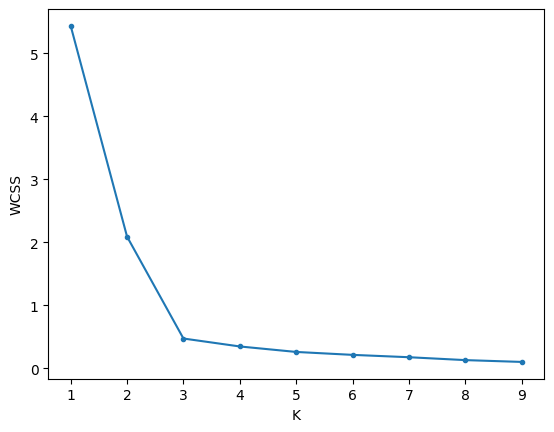

In [41]:
# Calculate Within-Cluster-Sum-of-Squares (WCSS) for different values of K
k_rng = range(1, 10)
wcss = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    wcss.append(km.inertia_)

# Plot the Elbow Method
plt.plot(k_rng, wcss, marker='.')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()
